In [49]:
import pandas as pd

In [50]:
import pandas as pd
import numpy as np

#NLTK
import nltk
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize

#Plotting 
import matplotlib.pyplot as plt


#Keras
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


In [51]:
def score(category):
    dict = {'18-22F' : 0.85556179, '23-45F' : 0.87431270, '46+F' : 0.83906224, '46+M' : 0.83220058, '23-45M' : 0.83609059, '18-22M' : 0.84184846}
    return dict[category]

def label(genders, ages, labels):
    yes = 0
    no = 0
    for i in range(0, 6):
        category = ages[i] + genders[i]
        if labels[i] == 'YES':
            yes += score(category)
        else:
            no += score(category)
    if yes > no:
        return 'YES'
    else:
        return 'NO'


In [52]:
train_yes_es = pd.read_json('training/EXIST2023_training.json')
train_yes_es=train_yes_es.transpose()
train_yes_es=train_yes_es.loc[train_yes_es['lang'].apply(lambda x:x=='es')]
train_yes_es=train_yes_es.loc[train_yes_es['labels_task1'].apply(lambda x:x.count('YES')>3)]
train_yes_es['label1']='YES'

#NO

train_no_es = pd.read_json('training/EXIST2023_training.json')
train_no_es=train_no_es.transpose()
train_no_es=train_no_es.loc[train_no_es['lang'].apply(lambda x:x=='es')]
train_no_es=train_no_es.loc[train_no_es['labels_task1'].apply(lambda x:x.count('NO')>3)]
train_no_es['label1']='NO'


train_amb = pd.read_json('training/EXIST2023_training.json')
train_amb=train_amb.transpose()
train_amb=train_amb.loc[train_amb['lang'].apply(lambda x:x=='es')]
train_amb=train_amb.loc[train_amb['labels_task1'].apply(lambda x:x.count('YES')==3)]
for i, sample in enumerate(train_amb.itertuples()):
    truelabel = label(sample[6], sample[7], sample[8])
    train_amb.at[sample[0], 'label1'] = truelabel



val_yes = pd.read_json('dev/EXIST2023_dev.json')
val_yes=val_yes.transpose()
val_yes=val_yes.loc[val_yes['lang'].apply(lambda x:x=='es')]
val_yes=val_yes.loc[val_yes['labels_task1'].apply(lambda x:x.count('YES')>3)]
val_yes['label1']='YES'

#NO
val_no = pd.read_json('dev/EXIST2023_dev.json')
val_no=val_no.transpose()
val_no=val_no.loc[val_no['lang'].apply(lambda x:x=='es')]
val_no=val_no.loc[val_no['labels_task1'].apply(lambda x:x.count('NO')>3)]
val_no['label1']='NO'



val_amb = pd.read_json('dev/EXIST2023_dev.json')
val_amb=val_amb.transpose()
val_amb=val_amb.loc[val_amb['lang'].apply(lambda x:x=='es')]
val_amb=val_amb.loc[val_amb['labels_task1'].apply(lambda x:x.count('YES')==3)]
for i, sample in enumerate(val_amb.itertuples()):
    truelabel = label(sample[6], sample[7], sample[8])
    val_amb.at[sample[0], 'label1'] = truelabel


In [53]:
frames = [train_yes_es, train_no_es,train_amb,val_yes,val_no,val_amb]
train = pd.concat(frames)
train.reset_index(drop=True)

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,YES
1,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES,YES
2,100008,es,@BestKabest Esta gringa sigue llorando por el ...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES,YES
3,100028,es,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES,YES
4,100036,es,@Harassed_girl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
4204,300508,es,le dije a mi mama q el lavarropas me hizo aguj...,6,"[Annotator_756, Annotator_757, Annotator_758, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[YES, YES, NO, NO, NO, YES]","[REPORTED, JUDGEMENTAL, -, -, -, DIRECT]","[[OBJECTIFICATION], [STEREOTYPING-DOMINANCE], ...",DEV_ES,YES
4205,300516,es,@loderaulo Ahí leí el plan progresar lamentabl...,6,"[Annotator_726, Annotator_727, Annotator_357, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, YES, YES, YES, NO, NO]","[-, DIRECT, DIRECT, DIRECT, -, -]","[[-], [IDEOLOGICAL-INEQUALITY], [STEREOTYPING-...",DEV_ES,YES
4206,300522,es,"@JesusRCuevas Un día sin narcos, un día sin ma...",6,"[Annotator_742, Annotator_743, Annotator_195, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, NO, YES, YES, YES, NO]","[-, -, REPORTED, JUDGEMENTAL, REPORTED, -]","[[-], [-], [SEXUAL-VIOLENCE], [IDEOLOGICAL-INE...",DEV_ES,NO
4207,300526,es,Si en España se implantara la pena de muerte s...,6,"[Annotator_744, Annotator_745, Annotator_746, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, NO, YES, YES, NO, YES]","[-, -, REPORTED, JUDGEMENTAL, -, REPORTED]","[[-], [-], [SEXUAL-VIOLENCE], [SEXUAL-VIOLENCE...",DEV_ES,NO


In [54]:
train_data = pd.DataFrame()
train_data['tweet'] = train['tweet']
train_data['label'] = train['label1']
train_data.reset_index(inplace=True, drop = True)
train_data

,tweet,label
0,"@TheChiflis Ignora al otro, es un capullo.El p...",YES
1,@novadragon21 @icep4ck @TvDannyZ Entonces como...,YES
2,@BestKabest Esta gringa sigue llorando por el ...,YES
3,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",YES
4,@Harassed_girl loca d mierda en k momento,YES
...,...,...
4204,le dije a mi mama q el lavarropas me hizo aguj...,YES
4205,@loderaulo Ahí leí el plan progresar lamentabl...,YES
4206,"@JesusRCuevas Un día sin narcos, un día sin ma...",NO
4207,Si en España se implantara la pena de muerte s...,NO


In [55]:
validation = pd.read_json('test/EXIST2023_test_clean.json')
validation=validation.transpose()
validation=validation.loc[validation['lang'].apply(lambda x:x=='es')]
validation

,id_EXIST,lang,tweet,split
500001,500001,es,@Eurogamer_es Todo gamergate desde el desarrol...,TEST_ES
500002,500002,es,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara...",TEST_ES
500003,500003,es,yo buscando las empresas metidas en el gamerga...,TEST_ES
500004,500004,es,"@jordirico Primero fue internet, luego el game...",TEST_ES
500005,500005,es,@AlonsoQuijano12 Yo estuve metido en el gamerg...,TEST_ES
...,...,...,...,...
501094,501094,es,Muchas Zorras Querían Hacerlo Feliz 😁Y Yo Lo H...,TEST_ES
501095,501095,es,@ibadbxtch__ @Citlaaaalic @emtzp21 cada día má...,TEST_ES
501096,501096,es,hola zorras os escribo desde el wc del trabajo...,TEST_ES
501097,501097,es,"@damaris12478454 @KarolCariola Asi es, Allende...",TEST_ES


In [56]:
validation_data = pd.DataFrame()
validation_data['tweet'] = validation['tweet']
validation_data.reset_index(inplace=True, drop = True)
validation_data

,tweet
0,@Eurogamer_es Todo gamergate desde el desarrol...
1,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara..."
2,yo buscando las empresas metidas en el gamerga...
3,"@jordirico Primero fue internet, luego el game..."
4,@AlonsoQuijano12 Yo estuve metido en el gamerg...
...,...
1093,Muchas Zorras Querían Hacerlo Feliz 😁Y Yo Lo H...
1094,@ibadbxtch__ @Citlaaaalic @emtzp21 cada día má...
1095,hola zorras os escribo desde el wc del trabajo...
1096,"@damaris12478454 @KarolCariola Asi es, Allende..."


In [57]:
import re
hash_regex = re.compile(r"#(\w+)")
hstgs = [] # To store the hashtags so we can exclude them from some parts of the analysis
def hash_repl(match):
    _ = '__HASH_'+match.group(1).upper()
    hstgs.append(_)
    return _

In [58]:
user_regex = re.compile(r"@(\w+)")
usr_names = [] # To store the user names so we can exclude them from some parts of the analysis
def user_repl(match):
    _ = '__user_'+match.group(1).upper()
    usr_names.append(_)
    return _

In [59]:
url_regex = re.compile(r"(http|https|ftp)://[a-zA-Z0-9\./]+")
def url_repl(match):
    return '__URL_'

In [60]:
# Repeating words like hurrrryyyyyy
rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE);
def rpt_repl(match):
    return match.group(1)+match.group(1)


In [61]:
# Spliting by word boundaries
word_bound_regex = re.compile(r"\W+")

# Punctuations
punctuations = \
	[	#('',		['.', ] )	,\
		#('',		[',', ] )	,\
		#('',		['\'', '\"', ] )	,\
		('__PUNC_EXCL',		['!', '¡', ] )	,\
		('__PUNC_QUES',		['?', '¿', ] )	,\
		('__PUNC_ELLP',		['...', '…', ] )	,\
	]

#For punctuation replacement
def punctuations_repl(match):
	text = match.group(0)
	repl = []
	for (key, parr) in punctuations :
		for punc in parr :
			if punc in text:
				repl.append(key)
	if( len(repl)>0 ) :
		return ' '+' '.join(repl)+' '
	else :
		return ' '

In [62]:

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [63]:
def sb_stem(text, only_first=0):
    text = [word if(word[0:2]=='__') else word.lower() for word in text.split() if ((len(word) >= 3) or (word in ['no','si', 'sí', 'ni']))] #   If we are doing negation analysis, maybe is a better idea to keep the small words (like 'no')
    text = [stemmer.stem(w) if w[0:2]!='__' else w for w in text ]
    
    return(text)

In [64]:
def processAll(text):
    text = re.sub( hash_regex, hash_repl, text )
    #text = re.sub( user_regex, user_repl, text)
    text = re.sub( url_regex, url_repl, text )
    
    text = text.replace('\'','')
    
    text = re.sub( word_bound_regex , punctuations_repl, text )
    text = re.sub( rpt_regex, rpt_repl, text )
    
    text = sb_stem(text)    
    return text

In [65]:
train['processed_tweet'] = train.tweet.apply(processAll)
validation['processed_tweet'] = validation.tweet.apply(processAll)

In [66]:
train.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1,processed_tweet
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,YES,"[thechiflis, ignor, otro, capull, problem, con..."
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES,YES,"[novadragon21, icep4ck, tvdannyz, entonc, com,..."
100008,100008,es,@BestKabest Esta gringa sigue llorando por el ...,6,"[Annotator_25, Annotator_26, Annotator_27, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, JUDGEMENTAL, DIRECT, ...","[[IDEOLOGICAL-INEQUALITY], [STEREOTYPING-DOMIN...",TRAIN_ES,YES,"[bestkabest, esta, gring, sig, llor, por, game..."
100028,100028,es,"@ShahidForChange @TeamPelosi Quiet, sexist ^%$...",6,"[Annotator_109, Annotator_110, Annotator_111, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, NO, YES, YES, YES]","[JUDGEMENTAL, -, -, DIRECT, DIRECT, DIRECT]","[[STEREOTYPING-DOMINANCE], [-], [-], [IDEOLOGI...",TRAIN_ES,YES,"[shahidforchang, teampelosi, quiet, sexist, __..."
100036,100036,es,@Harassed_girl loca d mierda en k momento,6,"[Annotator_115, Annotator_116, Annotator_117, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, YES, YES, YES, NO]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, -]","[[STEREOTYPING-DOMINANCE, SEXUAL-VIOLENCE], [M...",TRAIN_ES,YES,"[harassed_girl, loc, mierd, moment]"


In [67]:
train_data = pd.DataFrame()
train_data['tweet'] = train['processed_tweet']
train_data['label'] = train['label1']
train_data.reset_index(inplace=True, drop = True)
train_data

,tweet,label
0,"[thechiflis, ignor, otro, capull, problem, con...",YES
1,"[novadragon21, icep4ck, tvdannyz, entonc, com,...",YES
2,"[bestkabest, esta, gring, sig, llor, por, game...",YES
3,"[shahidforchang, teampelosi, quiet, sexist, __...",YES
4,"[harassed_girl, loc, mierd, moment]",YES
...,...,...
4204,"[dij, mam, lavarrop, hiz, agujer, una, poler, ...",YES
4205,"[loderaul, ahi, lei, plan, progres, lament, ha...",YES
4206,"[jesusrcuev, dia, sin, narc, dia, sin, masacr,...",NO
4207,"[españ, implant, pen, muert, terminari, los, d...",NO


In [68]:
validation_data = pd.DataFrame()
validation_data['tweet'] = validation['processed_tweet']
validation_data.reset_index(inplace=True, drop = True)
validation_data

,tweet
0,"[eurogamer_, tod, gamergat, desd, desarroll, h..."
1,"[arcangel__23, benzenazi, hombr, no, compar, m..."
2,"[busc, las, empres, met, gamergat, por, etc, e..."
3,"[jordir, primer, fue, internet, lueg, gamergat..."
4,"[alonsoquijano12, estuv, met, gamergat, asi, q..."
...,...
1093,"[much, zorr, quer, hac, feliz, hic, pap]"
1094,"[ibadbxtch__, citlaalic, emtzp21, cad, dia, ma..."
1095,"[hol, zorr, escrib, desd, del, trabajopd, esto..."
1096,"[damaris12478454, karolcariol, asi, allend, gr..."


In [69]:
print(max(train_data['tweet'].apply(len)))
print(max(validation_data['tweet'].apply(len)))

50
69


In [22]:
from gensim.models import KeyedVectors


In [46]:
vecs = KeyedVectors.load_word2vec_format('cc.es.300.vec', binary=False)

In [70]:
def vectorize_tweet(tweet):
    vec = []
    for word in tweet:
        if word in vecs.key_to_index:
            vec.append(vecs[word])
    return vec

In [71]:
train_data['tweet'] = train_data['tweet'].apply(vectorize_tweet)
validation_data['tweet'] = validation_data['tweet'].apply(vectorize_tweet)

In [72]:
print(max(train_data['tweet'].apply(len)))
print(max(validation_data['tweet'].apply(len)))

46
43


In [73]:
import random

X_train = list(train_data['tweet'])
Y_train = list(train_data['label'])

X_test = list(validation_data['tweet'])
temp = list(zip(X_train, Y_train))
random.shuffle(temp)
X_train, Y_train = zip(*temp)
X_train = list(X_train)
Y_train = list(Y_train)

In [74]:
import tensorflow as tf

In [78]:
def padto43(x):
    if len(x) < 46:
        for i in range(46 - len(x)):
            x.append([0]*300)
    return x

In [79]:
for i in range(len(X_train)):
    X_train[i] = padto43(X_train[i])

for i in range(len(X_test)):
    X_test[i] = padto43(X_test[i])

In [80]:
X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(X_test)

In [81]:
print(tf.shape(X_train_tensor))
print(tf.shape(X_test_tensor))

tf.Tensor([4209   46  300], shape=(3,), dtype=int32)
tf.Tensor([1098   46  300], shape=(3,), dtype=int32)


In [82]:
#convert yes to 1 and no to 0
for i in range(len(Y_train)):
    if Y_train[i] == 'YES':
        Y_train[i] = [1, 0]
    else:
        Y_train[i] = [0, 1]

In [83]:

Y_train_tensor = tf.convert_to_tensor(Y_train)


In [104]:
MLmodel = tf.keras.Sequential([
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])
MLmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MLmodel.build(input_shape=(None, 43, 300))
MLmodel.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               270600    
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4832      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 275,498
Trainable params: 275,498
Non-trainable params: 0
_________________________________________________________________


2023-05-05 17:27:31.501274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:27:31.502596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:27:31.503517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [105]:
num_epochs = 10
MLmodel.fit(X_train_tensor, Y_train_tensor, epochs=num_epochs)

Epoch 1/10


2023-05-05 17:27:32.334750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:27:32.335765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:27:32.336507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

132/132 [==============================] - 4s 21ms/step - loss: 0.6940 - accuracy: 0.5023
Epoch 2/10
132/132 [==============================] - 3s 21ms/step - loss: 0.6694 - accuracy: 0.6051
Epoch 3/10
132/132 [==============================] - 3s 20ms/step - loss: 0.6155 - accuracy: 0.6845
Epoch 4/10
132/132 [==============================] - 3s 20ms/step - loss: 0.5988 - accuracy: 0.7056
Epoch 5/10
132/132 [==============================] - 3s 20ms/step - loss: 0.5858 - accuracy: 0.7099
Epoch 6/10
132/132 [==============================] - 3s 21ms/step - loss: 0.5857 - accuracy: 0.7163
Epoch 7/10
132/132 [==============================] - 3s 20ms/step - loss: 0.5645 - accuracy: 0.7256
Epoch 8/10
132/132 [==============================] - 3s 22ms/step - loss: 0.5476 - accuracy: 0.7370
Epoch 9/10
132/132 [==============================] - 3s 22ms/step - loss: 0.5387 - accuracy: 0.7501
Epoch 10/10
132/132 [==============================] - 3s 21ms/step - loss: 0.5320 - accuracy: 0.7550


In [106]:
accuracy = MLmodel.history.history["accuracy"]



In [107]:
loss = MLmodel.history.history["loss"]


In [108]:
import matplotlib.pyplot as plt

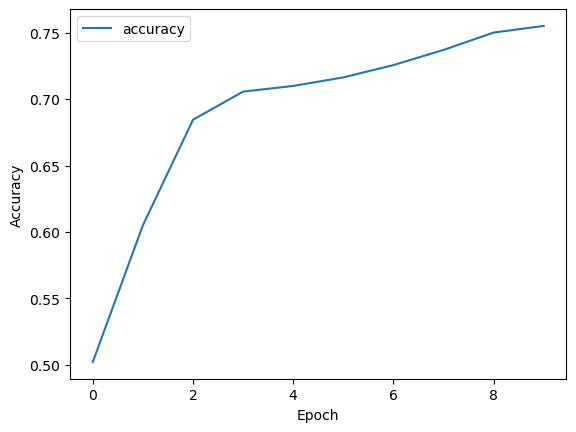

In [109]:
plt.plot(accuracy, label="accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


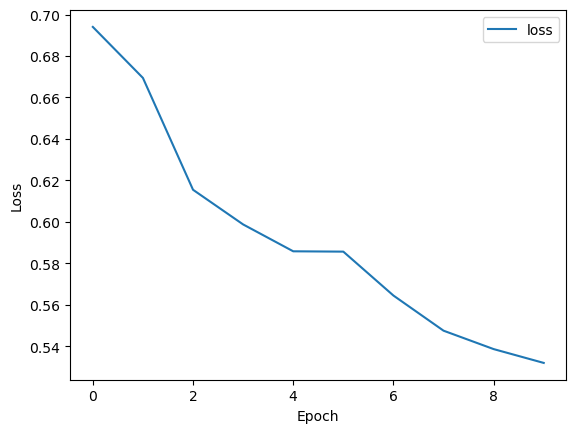

In [110]:
plt.plot(loss, label="loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [111]:
y_pred = MLmodel.predict(X_test_tensor)

 7/35 [=====>........................] - ETA: 0s

2023-05-05 17:28:13.595071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:28:13.596286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:28:13.597068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

35/35 [==============================] - 1s 8ms/step


In [112]:
final=[]
for row in y_pred:
    if row[0]>row[1]:
        final.append("YES")
    else:
        final.append("NO")

In [113]:
result_dict = {}
val_id=validation['id_EXIST'].to_list() 
for i in range(1098):
    

    temp={"hard_label":final[i]}
    result_dict[val_id[i]]=temp
    

In [114]:
print(result_dict)
myKeys = list(result_dict.keys())
myKeys.sort()
result_dict = {i: result_dict[i] for i in myKeys}

{'500001': {'hard_label': 'NO'}, '500002': {'hard_label': 'NO'}, '500003': {'hard_label': 'NO'}, '500004': {'hard_label': 'NO'}, '500005': {'hard_label': 'NO'}, '500006': {'hard_label': 'NO'}, '500007': {'hard_label': 'NO'}, '500008': {'hard_label': 'NO'}, '500009': {'hard_label': 'YES'}, '500010': {'hard_label': 'NO'}, '500011': {'hard_label': 'NO'}, '500012': {'hard_label': 'NO'}, '500013': {'hard_label': 'NO'}, '500014': {'hard_label': 'YES'}, '500015': {'hard_label': 'NO'}, '500016': {'hard_label': 'NO'}, '500017': {'hard_label': 'NO'}, '500018': {'hard_label': 'NO'}, '500019': {'hard_label': 'NO'}, '500020': {'hard_label': 'YES'}, '500021': {'hard_label': 'NO'}, '500022': {'hard_label': 'YES'}, '500023': {'hard_label': 'NO'}, '500024': {'hard_label': 'YES'}, '500025': {'hard_label': 'YES'}, '500026': {'hard_label': 'YES'}, '500027': {'hard_label': 'NO'}, '500028': {'hard_label': 'YES'}, '500029': {'hard_label': 'YES'}, '500030': {'hard_label': 'NO'}, '500031': {'hard_label': 'NO'}

In [115]:
import json

result_json = json.dumps(result_dict)

In [116]:
result_json

'{"500001": {"hard_label": "NO"}, "500002": {"hard_label": "NO"}, "500003": {"hard_label": "NO"}, "500004": {"hard_label": "NO"}, "500005": {"hard_label": "NO"}, "500006": {"hard_label": "NO"}, "500007": {"hard_label": "NO"}, "500008": {"hard_label": "NO"}, "500009": {"hard_label": "YES"}, "500010": {"hard_label": "NO"}, "500011": {"hard_label": "NO"}, "500012": {"hard_label": "NO"}, "500013": {"hard_label": "NO"}, "500014": {"hard_label": "YES"}, "500015": {"hard_label": "NO"}, "500016": {"hard_label": "NO"}, "500017": {"hard_label": "NO"}, "500018": {"hard_label": "NO"}, "500019": {"hard_label": "NO"}, "500020": {"hard_label": "YES"}, "500021": {"hard_label": "NO"}, "500022": {"hard_label": "YES"}, "500023": {"hard_label": "NO"}, "500024": {"hard_label": "YES"}, "500025": {"hard_label": "YES"}, "500026": {"hard_label": "YES"}, "500027": {"hard_label": "NO"}, "500028": {"hard_label": "YES"}, "500029": {"hard_label": "YES"}, "500030": {"hard_label": "NO"}, "500031": {"hard_label": "NO"